##### Devin Stern
Data Visualization Cohort 3
Homework 6

Three Observable Trends
---

Latitude basics: 0 is the equator. Negative Latitude refers to a point south of the equator (-60 degrees). Positive Latitude refers to a point north of the equator (60 degrees).

Earth basics: In the north of the Northern Hemisphere (latitudes above the equator) colder temperatures are observed in winter, which generally falls between December and February. Temperatures warm up in spring, March - May, and hit their peak in summer (June - August). Things then cool back down again in the fall (September - November).

In the Southern Hemisphere (latitudes below the equator) the season temperatures are inverted. Summer, with the warmest temperatures, is observed in December - February, Fall is March - May, Winter is June-August, and Spring is Sept - November.  

We are suveying the 'current weather' for April 5th 2019. This is a snapshot in time where the earth has spring conditions in the Northern Hemisphere, and autumn conditions in the Southern Hemisphere. 

Humidity Basics: Humidity is the measure of moisture in the air. 100% humidity means that no additional moisture can enter the air and must remain as water, which typically indicates precipitation, dew, or fog. 

Cloud Cover Basics: Cloud cover is correlated with the duration of sunshine in a particular area. According to Meteoblue.com, cloud cover is often grouped in classes of 0-25%, 25%-50%, etc. 0% means there is no visible cloud in the sky. 50% is equivalent to half the sky being covered with clouds.

Wind Basics: Earth has global wind patterns due to the way the atmosphere moves. The NE trade winds are between 0 to 30 degrees latitude, the SE trade winds are from 0 to -30 degrees latitude. The Westerlies fall between 30-60 degrees latitude and -30 to -60 latitude. The Westerlies are strongest in the winter and weakest during the summer. The polar easterlies are above 60 to 90 degrees and -60 to -90 degrees latitude (the north and south poles) and are often weak and irregular.

Many other things contribute to local wind speed and the generation of wind, including landscape, the ocean, etc.

1) Max Temperature vs. Latitude

The plot labeled "City Latitude vs. Max Temperature" shows that max temperature on April 5 2019 is higher in cities closer to the equator. Inversely, max temperature generally falls the further away a city is from the equator. The spring conditions in the furthest observed northern cities (btwn latitudes 40 and 60+ degrees) are much lower than the fall conditions in the furthest observed southern cities (btwn latitudes -40 and -60 degrees). 

2) Humidity and Latitude

The plot labled "City Latitude vs. Humidity" shows us the % humidity in each city at the time the current weather data was pulled. There doesn't seem to be any strong correlation between latitude and % humidity. There are cities across the spectrum (from the very most southern to the very most northern) that show high % of humidity.

Humidity is generally higher near water or coastal regions. While we cannot confirm the proximity of each city to a body of water with this particular data set, it is a consideration that affects the shape of this data. With that being said, one city on my plot has a humidity % reading of almost 300% - perhaps Atlantis in disguise.

3) Cloud Cover and Latitude

The plot labeled "City Latitude vs. Cloud Cover" shows us the % of cloud cover in each city at the time the current weather data was pulled. The data seems to be stratefied, with large concentrations of points around the 0%, 20%, 40%, 75%, and 90% markers. This may be due to how cloud cover is 'classified' or bucketed. Because of this bucketing, it's hard to get a true picture of trends on cloud cover. 

4) Wind Speed and Latitude

The plot labeled "City Latitude vs. Wind Speed" shows the wind speed (mph) for each city at the time the current weather data was pulled. There are a few interesting peaks at -60 degrees and 60 degrees. Otherwise the data seems to hover between 0 and 15mph.


In [2]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

#Import JSON
import json 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1700)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1700)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

676

In [4]:
#Set base url for openweather
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#Set wrapper
settings = {"units": "imperial", "appid": api_key}

In [5]:
#Call the API using a forloop that will skip over cities not found in the openweatherAPI

data = []
i=1

for city in cities:
    query_url = f"{base_url}appid={api_key}&q={city}"
   
    try:
        response = owm.get_current(city, **settings)
        data.append(response)
    
        print(f'Processing Record {i} of {len(cities)} | {city}')
        i += 1

    except:
        print("City not found. Skipping...")
        i += 1

Processing Record 1 of 676 | nikolskoye
Processing Record 2 of 676 | halifax
Processing Record 3 of 676 | victoria
Processing Record 4 of 676 | krasnoturansk
Processing Record 5 of 676 | rockhampton
Processing Record 6 of 676 | bethel
Processing Record 7 of 676 | jamestown
City not found. Skipping...
Processing Record 9 of 676 | moroni
Processing Record 10 of 676 | lapua
Processing Record 11 of 676 | yizheng
Processing Record 12 of 676 | cape town
Processing Record 13 of 676 | castro
Processing Record 14 of 676 | barrow
Processing Record 15 of 676 | sitka
Processing Record 16 of 676 | pitimbu
Processing Record 17 of 676 | albany
Processing Record 18 of 676 | mataura
Processing Record 19 of 676 | linjiang
Processing Record 20 of 676 | ribeira grande
Processing Record 21 of 676 | kimbe
Processing Record 22 of 676 | shibetsu
Processing Record 23 of 676 | rikitea
Processing Record 24 of 676 | pimentel
Processing Record 25 of 676 | ostrovnoy
Processing Record 26 of 676 | tuktoyaktuk
Process

Processing Record 214 of 676 | vardo
Processing Record 215 of 676 | chuy
Processing Record 216 of 676 | broken hill
Processing Record 217 of 676 | juegang
Processing Record 218 of 676 | rosarito
Processing Record 219 of 676 | bathsheba
Processing Record 220 of 676 | villanueva de la serena
Processing Record 221 of 676 | klyuchi
Processing Record 222 of 676 | diapaga
Processing Record 223 of 676 | tiksi
Processing Record 224 of 676 | sabha
Processing Record 225 of 676 | aykhal
Processing Record 226 of 676 | ozernovskiy
Processing Record 227 of 676 | xichang
Processing Record 228 of 676 | eureka
Processing Record 229 of 676 | cap malheureux
Processing Record 230 of 676 | rancho palos verdes
Processing Record 231 of 676 | salalah
City not found. Skipping...
Processing Record 233 of 676 | los llanos de aridane
Processing Record 234 of 676 | karlstad
Processing Record 235 of 676 | hasaki
Processing Record 236 of 676 | alice springs
Processing Record 237 of 676 | chulman
Processing Record 23

Processing Record 423 of 676 | micheldorf
Processing Record 424 of 676 | carballo
Processing Record 425 of 676 | sosnovo-ozerskoye
Processing Record 426 of 676 | te anau
Processing Record 427 of 676 | atasu
Processing Record 428 of 676 | zabaykalsk
Processing Record 429 of 676 | bom jesus
Processing Record 430 of 676 | menongue
Processing Record 431 of 676 | sao jose da coroa grande
Processing Record 432 of 676 | xiaoshi
Processing Record 433 of 676 | guarapuava
Processing Record 434 of 676 | tilichiki
Processing Record 435 of 676 | kutum
Processing Record 436 of 676 | siilinjarvi
Processing Record 437 of 676 | frohnleiten
Processing Record 438 of 676 | bethanien
Processing Record 439 of 676 | umm kaddadah
Processing Record 440 of 676 | grants
Processing Record 441 of 676 | vojka
Processing Record 442 of 676 | barcelos
Processing Record 443 of 676 | kasongo-lunda
Processing Record 444 of 676 | arman
City not found. Skipping...
Processing Record 446 of 676 | tautira
Processing Record 44

Processing Record 634 of 676 | santa luzia
Processing Record 635 of 676 | nabire
Processing Record 636 of 676 | diego de almagro
Processing Record 637 of 676 | manggar
Processing Record 638 of 676 | hays
Processing Record 639 of 676 | beihai
Processing Record 640 of 676 | havoysund
Processing Record 641 of 676 | kribi
Processing Record 642 of 676 | chahuites
City not found. Skipping...
Processing Record 644 of 676 | atherton
Processing Record 645 of 676 | muravlenko
Processing Record 646 of 676 | mattru
Processing Record 647 of 676 | sisimiut
Processing Record 648 of 676 | hope
City not found. Skipping...
Processing Record 650 of 676 | knysna
City not found. Skipping...
Processing Record 652 of 676 | banting
City not found. Skipping...
Processing Record 654 of 676 | thetford mines
Processing Record 655 of 676 | sandpoint
City not found. Skipping...
Processing Record 657 of 676 | guerrero negro
Processing Record 658 of 676 | mitu
City not found. Skipping...
Processing Record 660 of 676 

In [6]:
#Create a dataframe from the API response
weather_df = pd.DataFrame(data)

# Reorganizing the columns 
weather_df = weather_df[["name", "coord", "dt", "main", "clouds", "wind",
                            "base", "cod", "id", "rain", "sys", "visibility", "weather"]]

#Extract only the columns we are interested in
weather_df = weather_df.loc[:, ["name", "coord", "dt", "main", "clouds", "wind"]]

In [7]:
#Drop the NaN data from the "name" and cloud cover dictionary so we can make a new dataframe without any missing countries
weather_df = weather_df.dropna(subset=['name'])
weather_df = weather_df.dropna(subset=['clouds'])
weather_df.head()

,name,coord,dt,main,clouds,wind
0,Nikolskoye,"{'lon': 30.79, 'lat': 59.7}",1554517836,"{'temp': 28.76, 'pressure': 1027, 'humidity': ...",{'all': 0},"{'speed': 2.24, 'deg': 140}"
1,Halifax,"{'lon': -63.58, 'lat': 44.65}",1554518410,"{'temp': 32.97, 'pressure': 1026, 'humidity': ...",{'all': 90},"{'speed': 11.41, 'deg': 260}"
2,Victoria,"{'lon': 115.24, 'lat': 5.28}",1554516000,"{'temp': 86.72, 'pressure': 1013, 'humidity': ...",{'all': 75},"{'speed': 5.82, 'deg': 50}"
3,Krasnoturansk,"{'lon': 91.57, 'lat': 54.32}",1554516000,"{'temp': 35.6, 'pressure': 1017, 'humidity': 3...",{'all': 0},"{'speed': 6.71, 'deg': 350}"
4,Rockhampton,"{'lon': 150.51, 'lat': -23.38}",1554516000,"{'temp': 84.2, 'pressure': 1019, 'humidity': 4...",{'all': 40},"{'speed': 11.41, 'deg': 110}"


In [8]:
#Turn the "Main" dictionary into a list
main_list = weather_df['main'].tolist()

In [9]:
#Turn the "coord" dictionary into a list
coord_list= weather_df['coord'].tolist()

In [10]:
#Turn the "wind" dictionary into a list
wind_list = weather_df['wind'].tolist()

In [11]:
#Turn the "clouds" dictionary into a list
cloud_list = weather_df['clouds'].tolist()

In [12]:
#Convert the "clouds list" into a dataframe
cloud_df = pd.DataFrame(cloud_list)

In [13]:
#Convert the "Main_List" list into a DataFrame
temp_df = pd.DataFrame(main_list)


In [14]:
#Convert the "Coord_list" into a DataFrame
coord_df = pd.DataFrame(coord_list)


In [15]:
#Convert the "wind_list" into a DataFrame
wind_df = pd.DataFrame(wind_list)


In [16]:
#Create a series that only holds the name and date so when I join there are no overlaps
name_list = weather_df.loc[:, ["name", "dt"]]


In [17]:
#Turn the name/date series into a dataframe
name_df = pd.DataFrame(name_list)

In [21]:
#Combine all required info into one dataframe

weatherone_df = name_df.join(coord_df, how='outer')
weathertwo_df = weatherone_df.join(temp_df, how='outer')
weatherthree_df = weathertwo_df.join(cloud_df, how='outer')
final_weather_df = weatherthree_df.join(wind_df, how='outer')
final_weather_df = final_weather_df.loc[:, ["name", "dt", "lat", "lon",
                                           "humidity", "temp_max", "speed", "all", ]]

#Rename column headers
final_weather_df = final_weather_df.rename(columns={"name": "City",
                                                    "dt": "Date",
                                                    "lat": "Latitude",
                                                   "lon": "Longitude",
                                                   "humidity": "Humidity",
                                                   "temp_max": "Max Temp",
                                                   "speed": "Wind Speed",
                                                   "all": "Cloud Cover"})
final_weather_df.head()


,City,Date,Latitude,Longitude,Humidity,Max Temp,Wind Speed,Cloud Cover
0,Nikolskoye,1554517836,59.70,30.79,68,33.01,2.24,0
1,Halifax,1554518410,44.65,-63.58,31,34.00,11.41,90
2,Victoria,1554516000,5.28,115.24,70,87.80,5.82,75
3,Krasnoturansk,1554516000,54.32,91.57,37,35.60,6.71,0
4,Rockhampton,1554516000,-23.38,150.51,42,84.20,11.41,40


In [33]:
#Turn the dataframe output into CSV without the index
output = final_weather_df.to_csv(index=False)

#Write data to CSV file
with open("weather.csv", 'w') as csv_file:
    csv_file.write(output)

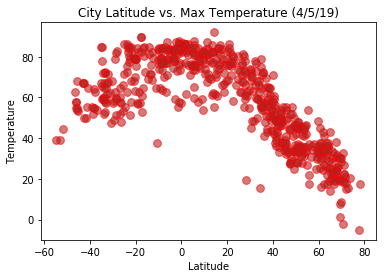

In [26]:
#Latitude vs. Temperature Plot
#Set up the general layout of the plot

plt.title("City Latitude vs. Max Temperature (4/5/19)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

#Set up the look of the data
max_temp = plt.scatter(final_weather_df['Latitude'], final_weather_df['Max Temp'],
                      s=60, marker='o', color='firebrick', edgecolor='red', alpha=0.6)

plt.savefig("../Homework 6/Temperature.png")


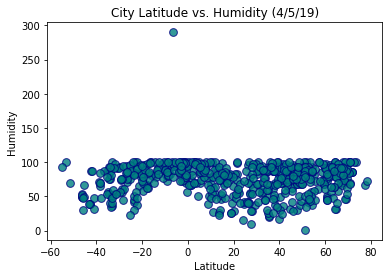

In [27]:
#Latitude vs. Humidity Plot (date)
#Set up the general latout of the plot

plt.title ("City Latitude vs. Humidity (4/5/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Set up the look of the data points
humidity = plt.scatter(final_weather_df['Latitude'], final_weather_df['Humidity'],
                      s=60, marker='o', color='teal', edgecolor='navy', alpha=0.8)

plt.savefig("../Homework 6/Humidity.png")

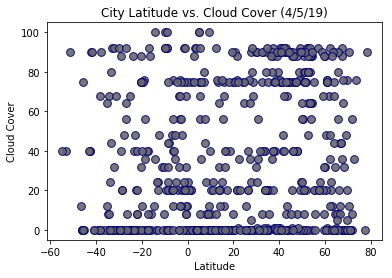

In [28]:
#Latitude vs. Cloudiness Plot (date)
#Set up the general latout of the plot 

plt.title ("City Latitude vs. Cloud Cover (4/5/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover")

#Set up the look of the data points
humidity = plt.scatter(final_weather_df['Latitude'], final_weather_df['Cloud Cover'],
                      s=60, marker='o', color='dimgrey', edgecolor='navy', alpha=0.9)

plt.savefig("../Homework 6/CloudCover.png")

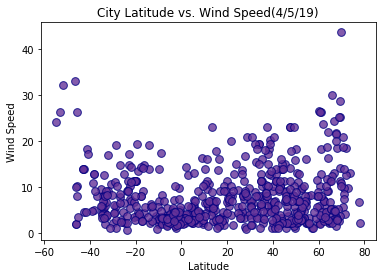

In [29]:
#Latitude vs. Windspeed Plot (date)
#Set up the general latout of the plot

plt.title ("City Latitude vs. Wind Speed(4/5/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Set up the look of the data points
humidity = plt.scatter(final_weather_df['Latitude'], final_weather_df['Wind Speed'],
                      s=60, marker='o', color='rebeccapurple', edgecolor='navy', alpha=0.8)

plt.savefig("../Homework 6/WindSpeed.png")